In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import dabl
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

We can see that Z_CostContact and Z_Revenue has Constant Value, So It has no effect on our Prediction.
We can see that ID is not useful for Prediction.
We can see that Dt_Customer has no effect in Prediction
So, we can drop all of these columns

In [6]:
data.drop(['Z_CostContact','Z_Revenue','ID','Dt_Customer'],axis=1,inplace=True)

In [7]:
# Converting the Year_Birth into Age
data['Age'] = 2021-data['Year_Birth']
# Now we can drop Year_Birth 
data.drop('Year_Birth',axis=1,inplace=True)

In [8]:
data['Age']

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2240, dtype: int64

In [9]:
data.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
dtype: int64

In [10]:
data['Income'].fillna(data['Income'].mean(),inplace=True)

In [11]:
data.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
dtype: int64

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


## Univariate Analysis

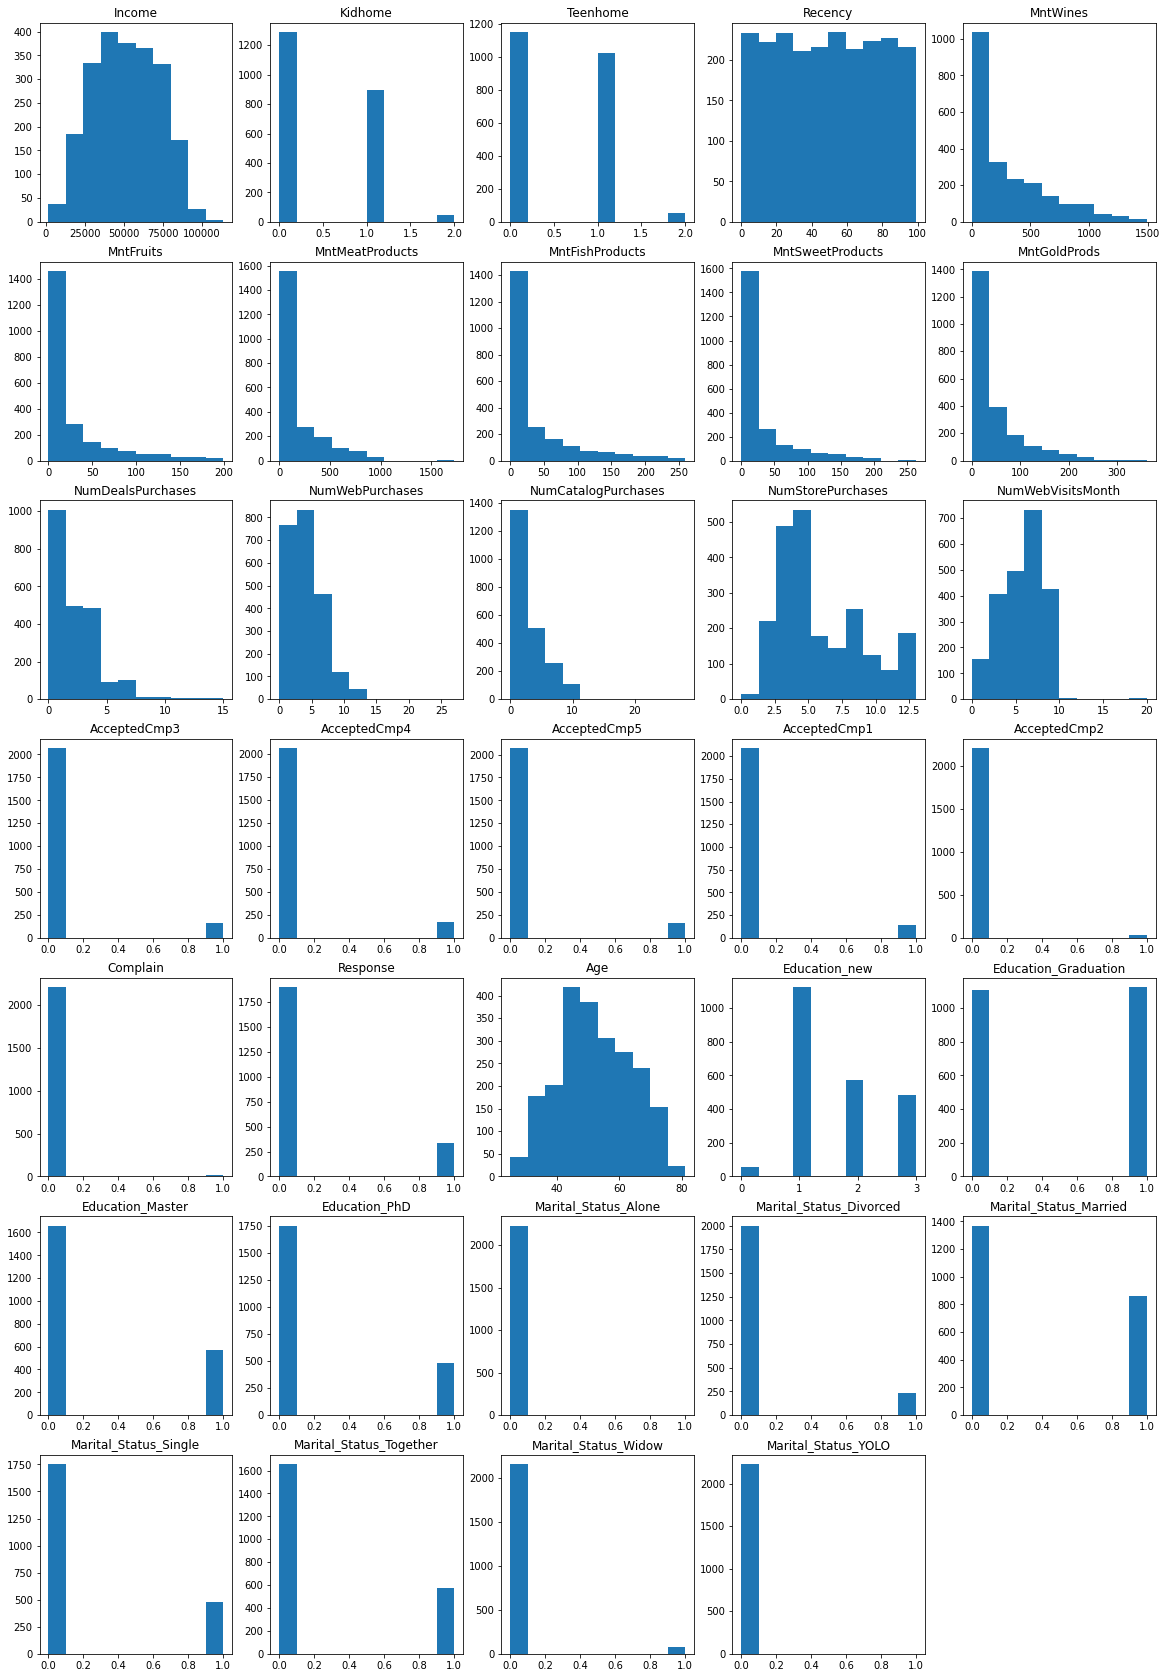

In [64]:
j=1
plt.figure(figsize=(20,30))
for i in data.columns:
    plt.subplot(7,5,j)
    plt.hist(data[i])
    j=j+1
    plt.title(i)
plt.show()

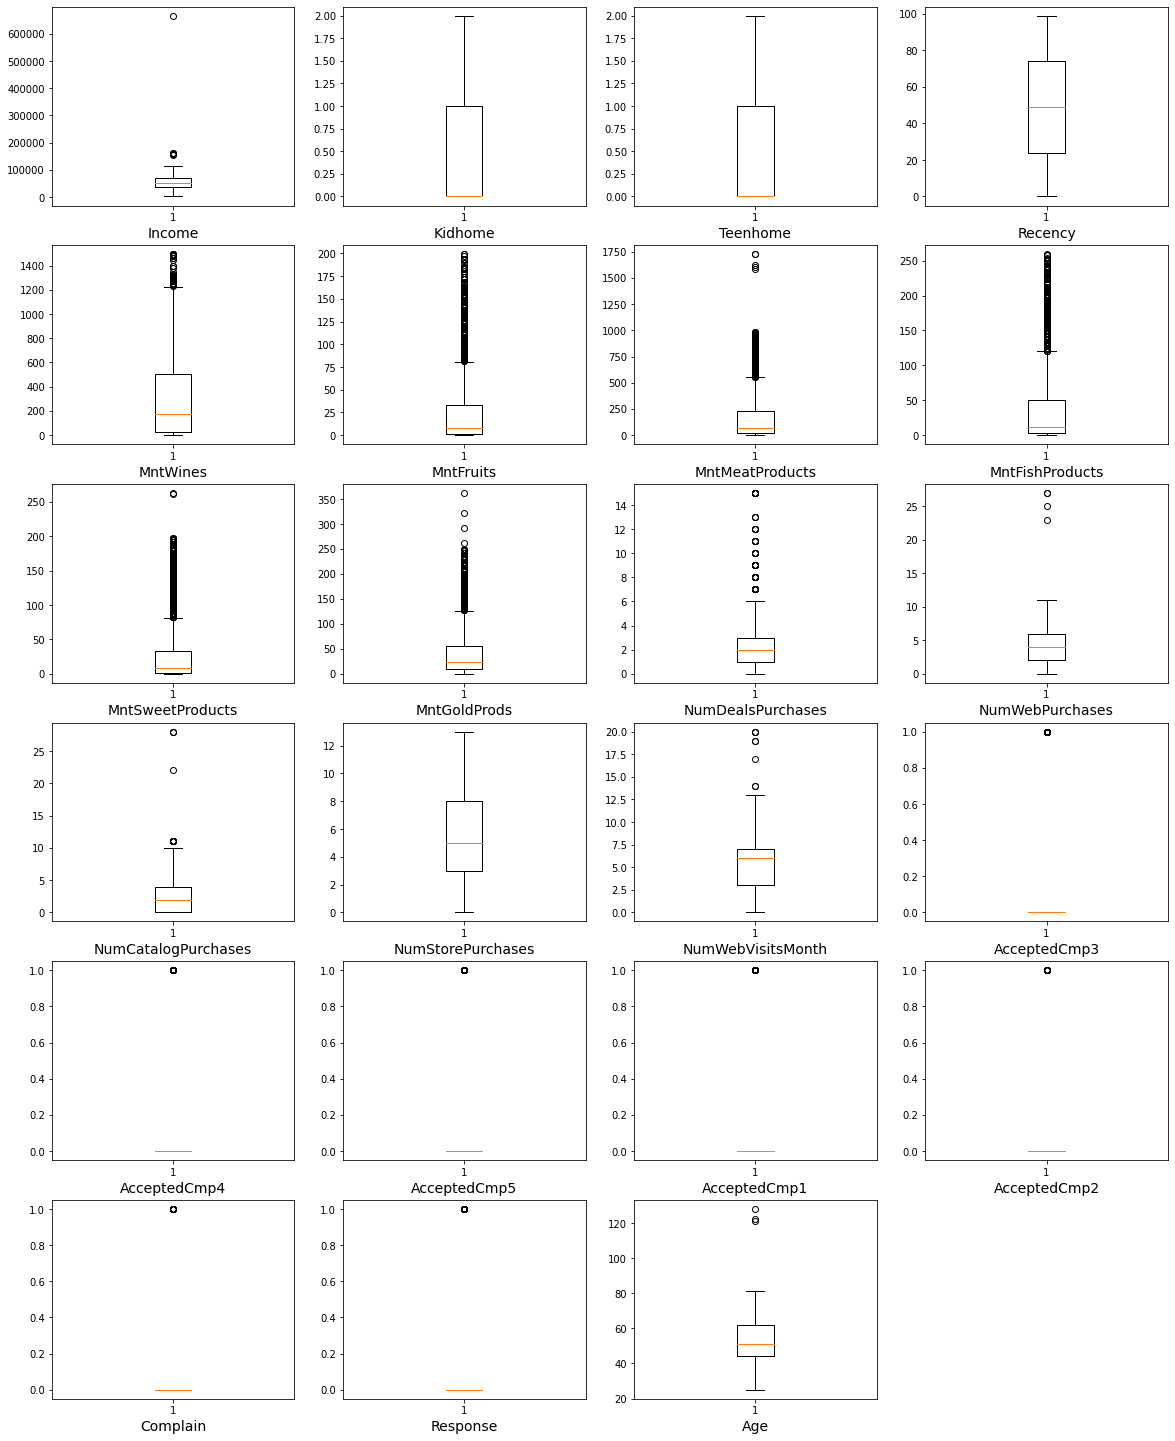

In [14]:
## Checking the Outliers in the dataset
num_coln = []
j=1
for i in data.columns:
    if data[i].dtype != 'object':
        num_coln.append(i)
        
fig = plt.figure(figsize = (20, 30))        
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(data[i])
    j=j+1
    plt.xlabel(i,fontsize=14)
plt.show()

## Bivariate Analysis

We can see some clear outliers in Income and Age. We will remove the rows where the Income is greater than 120K and birth year is less than 1920.

For other columns, we cannot blindly remove these outliers as there could be cases where the requirement for these products is high by the user. Maybe the consumer is hosting a party or an event or is more comfortable getting his products from a particular channel.

In [15]:
data.drop(data[(data['Income']>120000)|(data['Age']>100)].index,inplace=True)

In [16]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,54
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,75
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,0,0,40
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,0,0,65


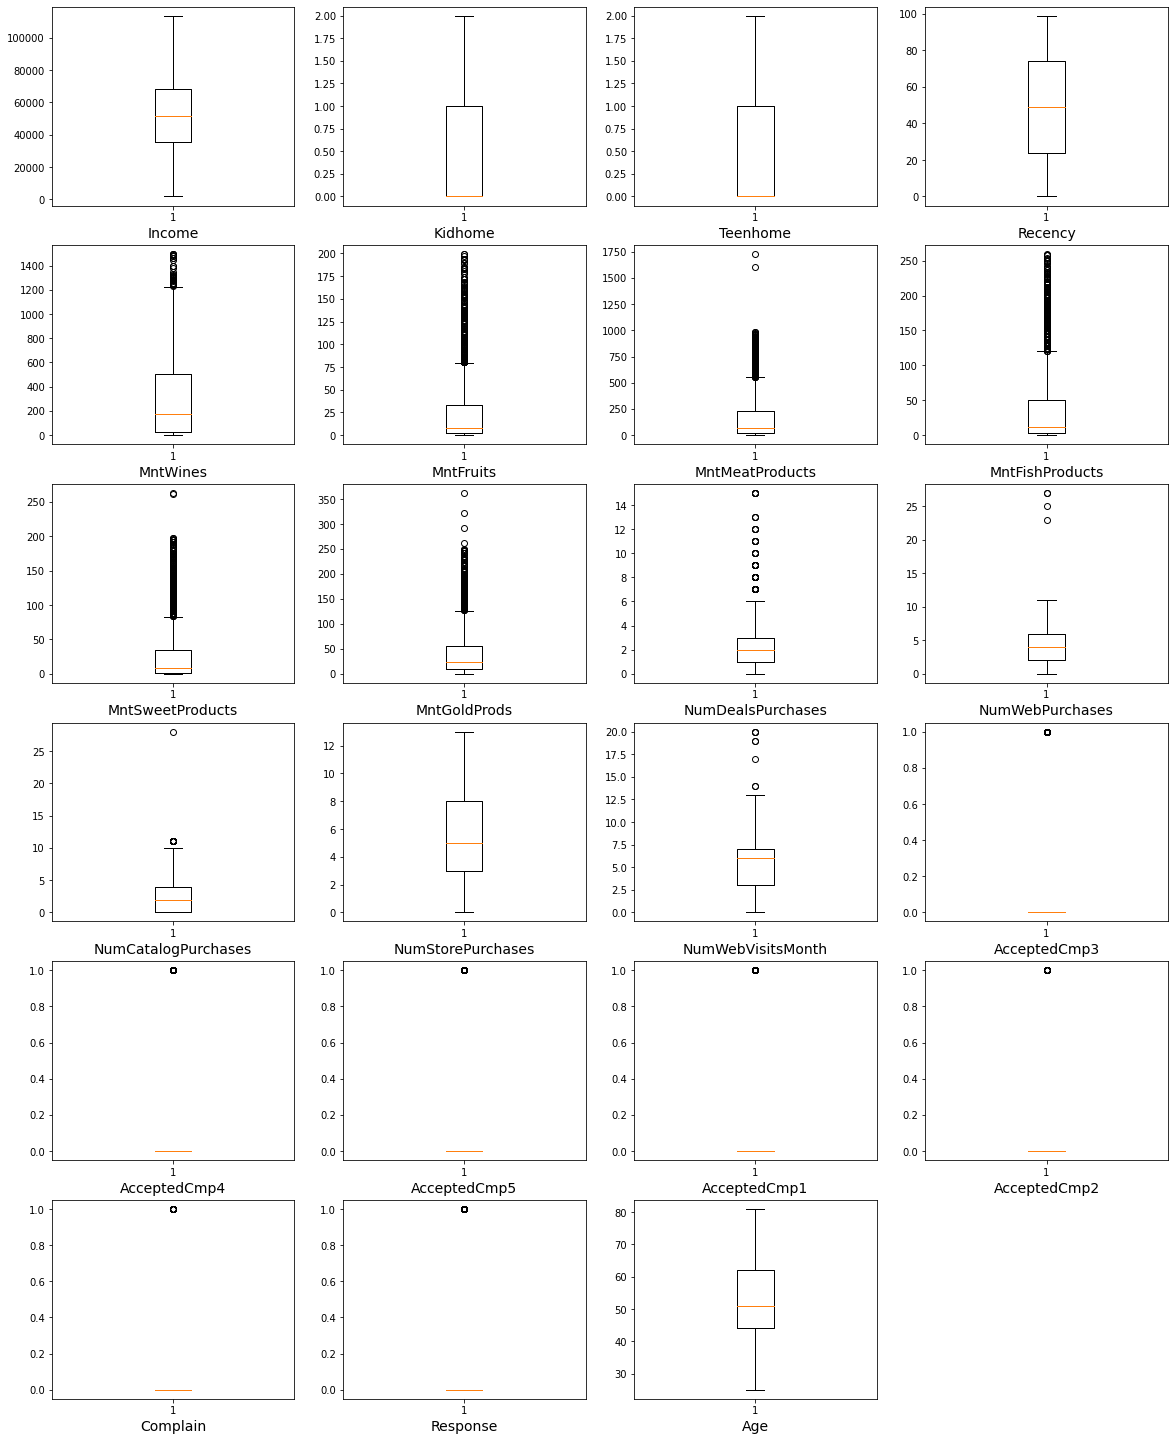

In [17]:
## Again Checking the Outliers in the datset
## Checking the Outliers in the dataset
num_coln = []
j=1
for i in data.columns:
    if data[i].dtype != 'object':
        num_coln.append(i)
        
fig = plt.figure(figsize = (20, 30))        
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(data[i])
    j=j+1
    plt.xlabel(i,fontsize=14)
plt.show()

we can see that there is no outlier in Age and Income Variable

## Correlation

In [18]:
data_corr=data.corr()
data_corr['Response'].sort_values(ascending=False)

Response               1.000000
AcceptedCmp5           0.327911
AcceptedCmp1           0.293617
AcceptedCmp3           0.253838
MntMeatProducts        0.247103
MntWines               0.246534
NumCatalogPurchases    0.235325
AcceptedCmp4           0.176544
Income                 0.174419
AcceptedCmp2           0.169131
NumWebPurchases        0.147032
MntGoldProds           0.139726
MntFruits              0.125192
MntSweetProducts       0.116545
MntFishProducts        0.110609
NumStorePurchases      0.036697
NumDealsPurchases      0.003424
Complain               0.000042
NumWebVisitsMonth     -0.007097
Age                   -0.018918
Kidhome               -0.080514
Teenhome              -0.155726
Recency               -0.199078
Name: Response, dtype: float64

<AxesSubplot:>

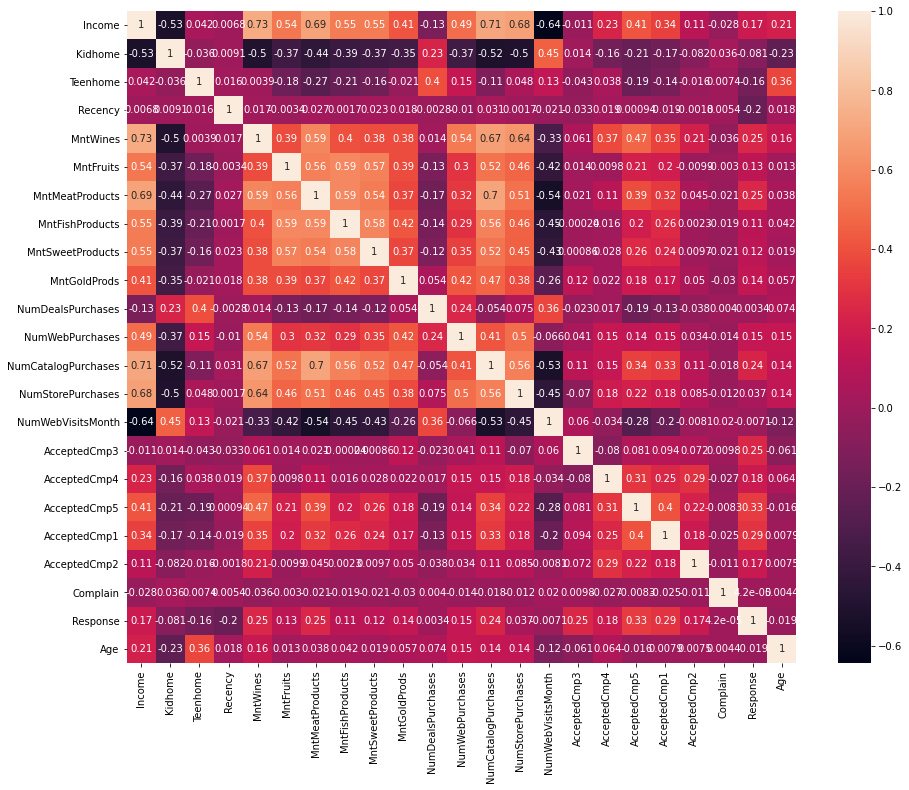

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(data_corr,annot=True)

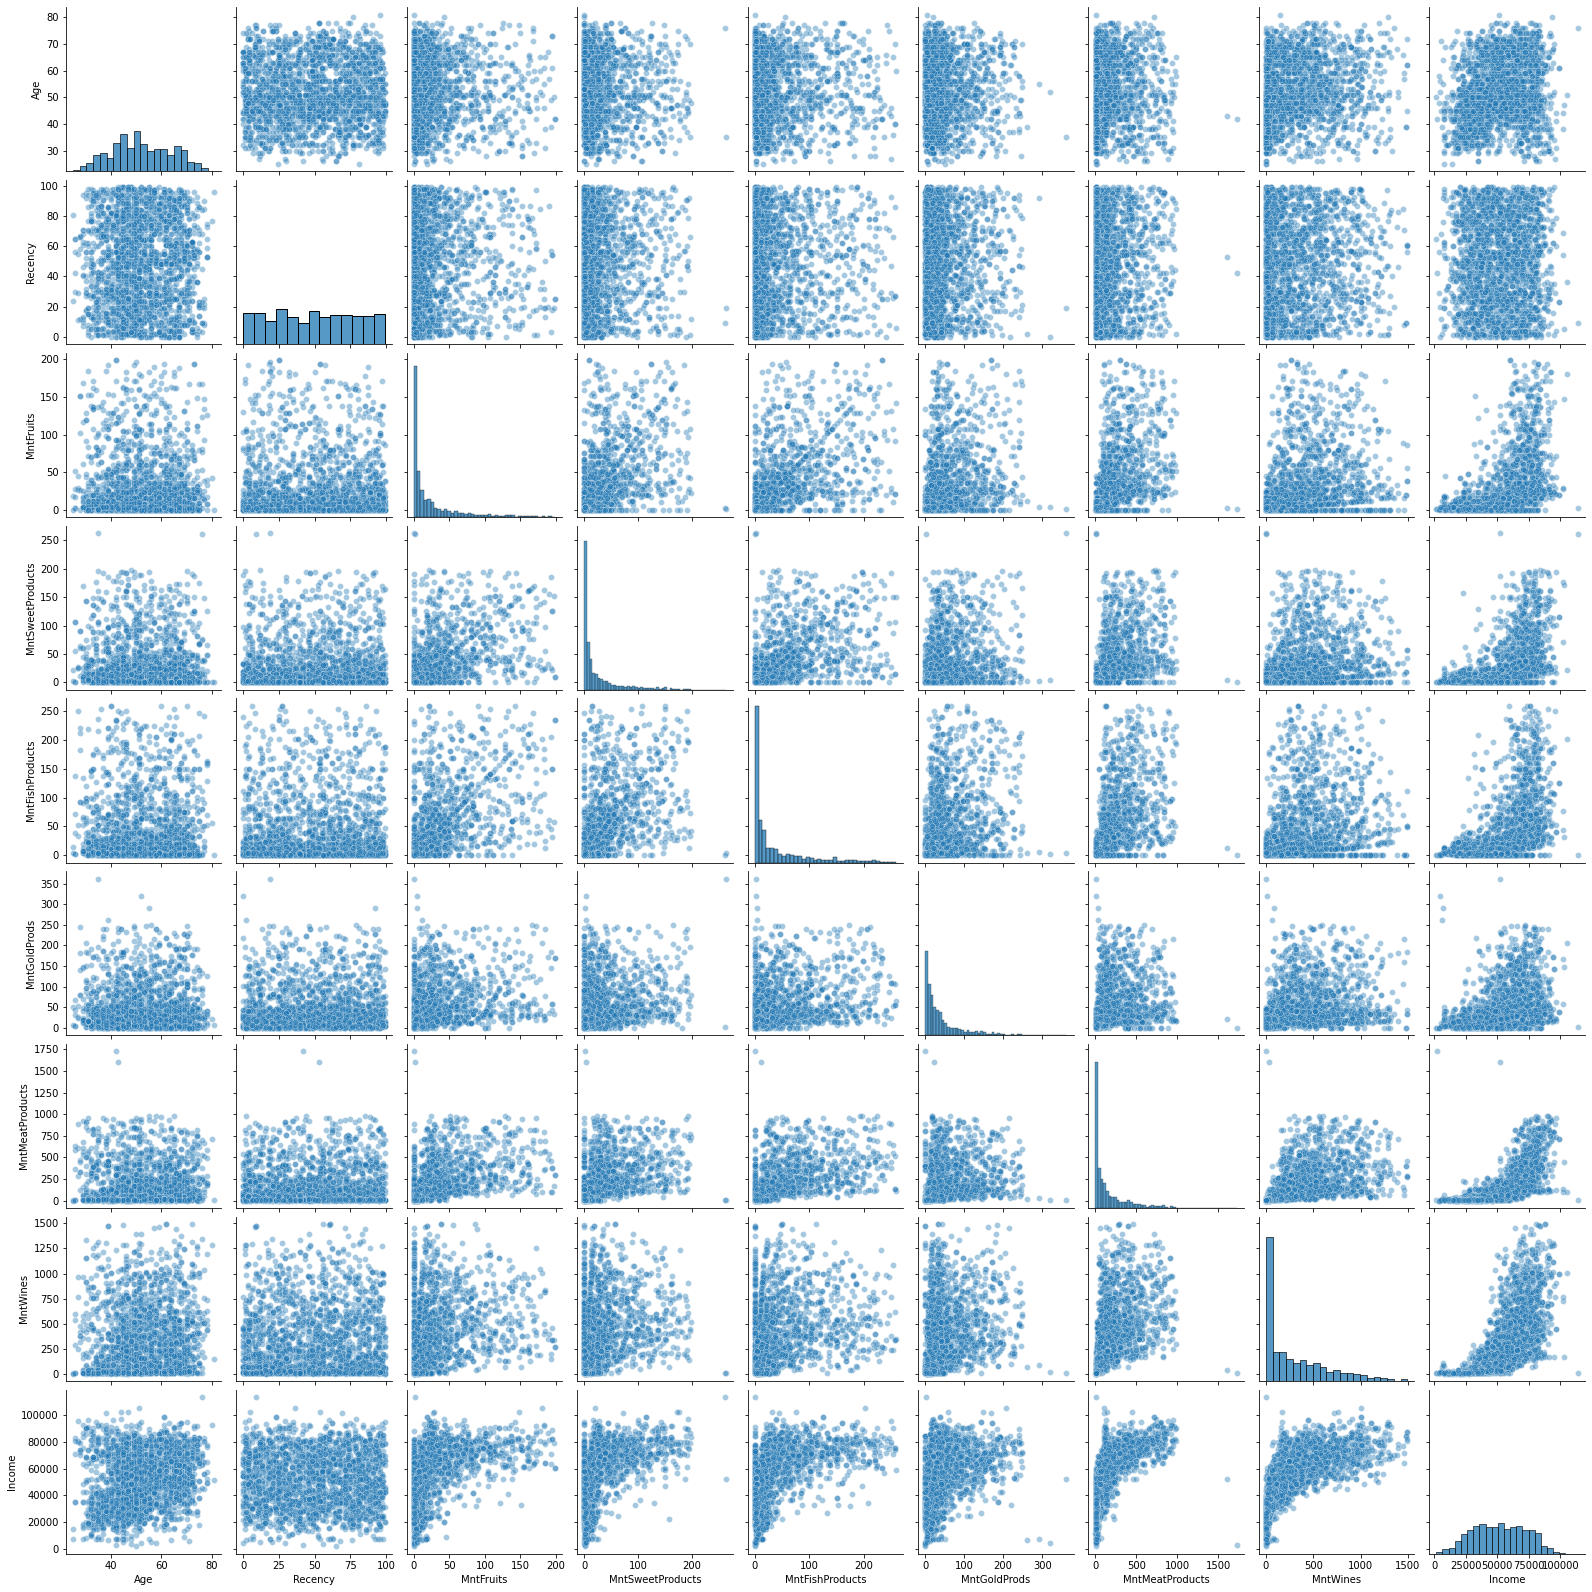

In [20]:
# Choose features have over 50 different values
NUMERICAL_FEATURES = ['Age', 'Recency', 'MntFruits', 
                      'MntSweetProducts', 'MntFishProducts', 'MntGoldProds', 
                      'MntMeatProducts', 'MntWines', 'Income']

sns.pairplot(data=data[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.4})
plt.show()

In [21]:
data['Education']=data['Education'].replace('2n Cycle','Master')

In [22]:
## Converting the Categorical Variable into Continous Variable
dic={
    'Basic':0,
    'Graduation':1,
    'Master':2,
    'PhD': 3
}
data['Education_new']=data['Education'].map(dic)
# data.drop('Education',axis=1,inplace=True)

In [23]:
data['Education'].value_counts()

Graduation    1124
Master         570
PhD            481
Basic           54
Name: Education, dtype: int64

In [24]:
data.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Education_new          0
dtype: int64

In [25]:
data = pd.get_dummies(data,drop_first=True)

In [26]:
features=data.drop('Response',axis=1)
label=data['Response']

In [27]:
## Feature Selection by Random Forest Classifier
model=RandomForestClassifier()
model.fit(features,label)
imp_features=model.feature_importances_

In [28]:
imp_features

array([0.07488029, 0.00840069, 0.01209079, 0.09532408, 0.07205774,
       0.03953824, 0.07318672, 0.04390568, 0.04535496, 0.05844141,
       0.03212713, 0.03308986, 0.04117091, 0.04382826, 0.04615063,
       0.03861292, 0.00998802, 0.04336413, 0.04007817, 0.0097633 ,
       0.00104946, 0.05084721, 0.01498839, 0.00824052, 0.00774115,
       0.0080228 , 0.00106439, 0.00789827, 0.01264539, 0.01229682,
       0.00900471, 0.00414098, 0.000706  ])

<AxesSubplot:>

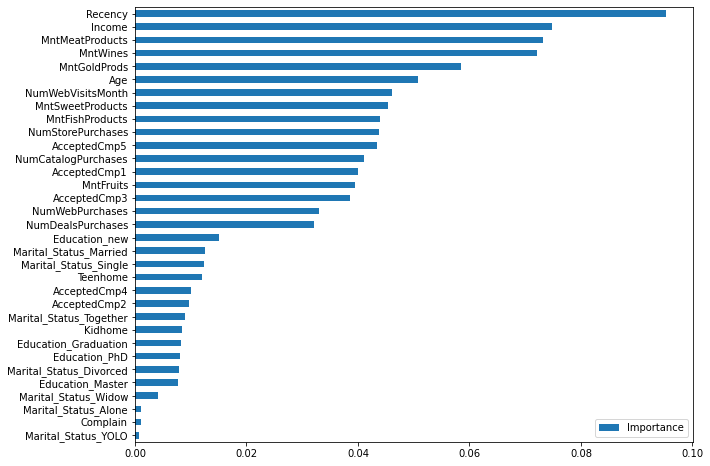

In [29]:
feature_importance = pd.DataFrame(imp_features, index=features.columns, columns=["Importance"])
feature_importance.sort_values(by='Importance',ascending=True).plot(kind='barh',figsize=(10,8))

In [30]:
## Train-Test Spilliting 
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [31]:
def predict(model):
    print('Model is {}'.format(model))
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print('Accuracy of model {}'.format(model))
    print(accuracy_score(y_test,pred))
    print('Confusion matrix : {}'.format(model))
    print(confusion_matrix(y_test,pred))
    print('Classification Report of model:{}'.format(model))
    print(classification_report(pred,y_test))
    return sns.distplot(y_test-pred)

Model is LogisticRegression()
Accuracy of model LogisticRegression()
0.8721973094170403
Confusion matrix : LogisticRegression()
[[384   9]
 [ 48   5]]
Classification Report of model:LogisticRegression()
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       432
           1       0.09      0.36      0.15        14

    accuracy                           0.87       446
   macro avg       0.54      0.62      0.54       446
weighted avg       0.95      0.87      0.91       446



<AxesSubplot:xlabel='Response', ylabel='Density'>

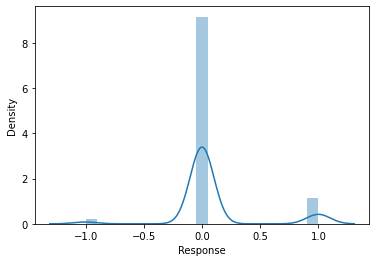

In [32]:
predict(LogisticRegression())

Model is DecisionTreeClassifier()
Accuracy of model DecisionTreeClassifier()
0.8565022421524664
Confusion matrix : DecisionTreeClassifier()
[[349  44]
 [ 20  33]]
Classification Report of model:DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       369
           1       0.62      0.43      0.51        77

    accuracy                           0.86       446
   macro avg       0.76      0.69      0.71       446
weighted avg       0.84      0.86      0.85       446



<AxesSubplot:xlabel='Response', ylabel='Density'>

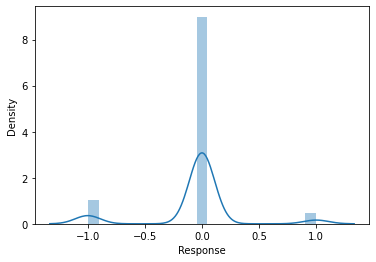

In [33]:
predict(DecisionTreeClassifier())

Model is RandomForestClassifier()
Accuracy of model RandomForestClassifier()
0.8946188340807175
Confusion matrix : RandomForestClassifier()
[[380  13]
 [ 34  19]]
Classification Report of model:RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       414
           1       0.36      0.59      0.45        32

    accuracy                           0.89       446
   macro avg       0.66      0.76      0.69       446
weighted avg       0.92      0.89      0.91       446



<AxesSubplot:xlabel='Response', ylabel='Density'>

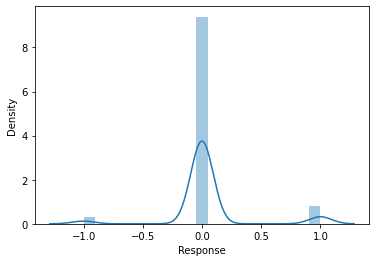

In [34]:
predict(RandomForestClassifier())

Model is AdaBoostClassifier()
Accuracy of model AdaBoostClassifier()
0.874439461883408
Confusion matrix : AdaBoostClassifier()
[[364  29]
 [ 27  26]]
Classification Report of model:AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       391
           1       0.49      0.47      0.48        55

    accuracy                           0.87       446
   macro avg       0.71      0.70      0.71       446
weighted avg       0.87      0.87      0.87       446



<AxesSubplot:xlabel='Response', ylabel='Density'>

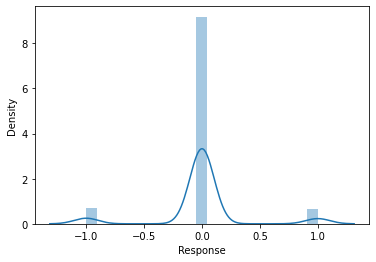

In [35]:
predict(AdaBoostClassifier())

Model is GaussianNB()
Accuracy of model GaussianNB()
0.7668161434977578
Confusion matrix : GaussianNB()
[[319  74]
 [ 30  23]]
Classification Report of model:GaussianNB()
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       349
           1       0.43      0.24      0.31        97

    accuracy                           0.77       446
   macro avg       0.62      0.58      0.58       446
weighted avg       0.73      0.77      0.74       446



<AxesSubplot:xlabel='Response', ylabel='Density'>

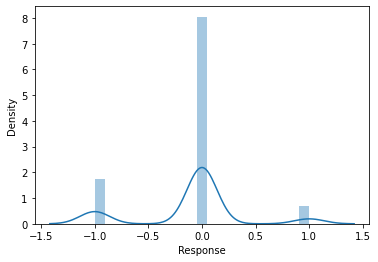

In [37]:
predict(GaussianNB())

We can see that Adaboost Performs better than all

In [38]:
## Clustering (Unsupervised Learning Task)
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(features)

KMeans(n_clusters=3)

In [39]:
identified_clusters = kmeans.fit_predict(features)
identified_clusters

array([0, 0, 1, ..., 0, 1, 0])

Text(0, 0.5, 'WCSS')

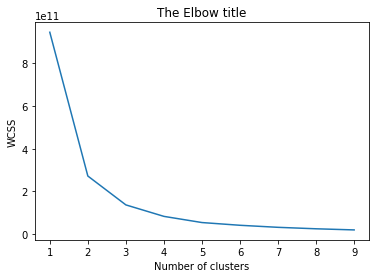

In [47]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Age')

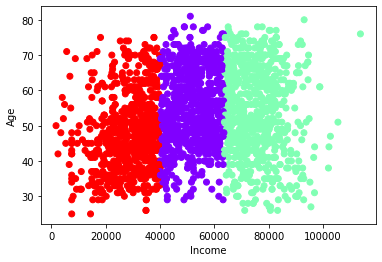

In [45]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Income'],data_with_clusters['Age'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Age')

In [65]:
data_with_clusters

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,0,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,1,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,1,0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,1,0,0,2
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,1,0,0,0,0,1,0,0,1
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,0,1,0,0,1


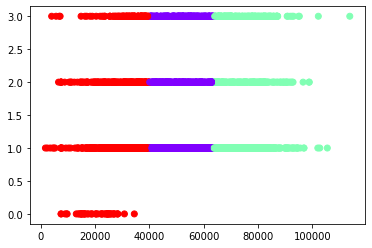

In [48]:
plt.scatter(data_with_clusters['Income'],data_with_clusters['Education_new'],c=data_with_clusters['Clusters'],cmap='rainbow')

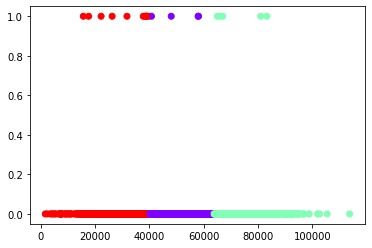

In [66]:
plt.scatter(data_with_clusters['Income'],data_with_clusters['Complain'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [70]:
data_with_clusters[data_with_clusters['Clusters'] == 0]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters
0,58138.000000,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,0,0,0,0
1,46344.000000,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,1,0,0,0,0
4,58293.000000,1,0,94,173,43,118,46,27,15,...,0,1,0,0,1,0,0,0,0,0
5,62513.000000,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,0,1,0,0,0
6,55635.000000,0,1,34,235,65,164,50,49,27,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,52247.251354,0,0,53,32,2,1607,12,4,22,...,1,0,0,0,0,0,1,0,0,0
2231,44802.000000,0,0,71,853,10,143,13,10,20,...,1,0,0,0,0,1,0,0,0,0
2235,61223.000000,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,0,0,0
2237,56981.000000,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,0,0,0,0


In [71]:
data_with_clusters[data_with_clusters['Clusters'] == 1]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,1,0,0,1
15,82800.0,0,0,23,1006,22,115,59,68,45,...,0,1,0,0,0,1,0,0,0,1
18,76995.0,0,1,91,1012,80,498,0,16,176,...,1,0,0,0,1,0,0,0,0,1
23,65324.0,0,1,0,384,0,102,21,32,5,...,0,1,0,0,1,0,0,0,0,1
29,84618.0,0,0,96,684,100,801,21,66,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,82032.0,0,0,54,332,194,377,149,125,57,...,0,1,0,0,0,0,0,1,0,1
2221,75777.0,0,0,12,712,26,538,69,13,80,...,1,0,0,0,0,1,0,0,0,1
2226,63777.0,1,1,87,457,5,106,15,17,53,...,0,0,0,0,1,0,0,0,0,1
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,1,0,0,0,0,1,0,0,1


In [72]:
data_with_clusters[data_with_clusters['Clusters'] == 2]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,1,0,0,2
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,1,0,0,1,0,0,0,0,2
8,30351.0,1,0,19,14,0,24,3,3,2,...,0,1,0,0,0,0,1,0,0,2
9,5648.0,1,1,68,28,0,6,1,1,13,...,0,1,0,0,0,0,1,0,0,2
11,7500.0,0,0,59,6,16,11,11,1,16,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,33562.0,1,2,33,21,12,12,0,3,3,...,1,0,0,0,1,0,0,0,0,2
2229,24434.0,2,0,9,3,2,8,20,0,17,...,0,0,0,0,1,0,0,0,0,2
2230,11012.0,1,0,82,24,3,26,7,1,23,...,0,0,0,0,0,1,0,0,0,2
2232,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,0,1,0,0,0,2
